# Проект Maven Cafe

Вы - старший аналитик по маркетингу в Maven Cafe.  
Вы только что провели тест, отправив различные комбинации рекламных предложений
существующим участникам программы лояльности. Теперь, когда 30-дневный период
теста завершился, ваша задача — определить ключевые сегменты клиентов и
разработать стратегию, основанную на данных, для будущих рекламных сообщений и
таргетирования.  
Результаты должны быть изложены в отчете, который будет представлен директору по
маркетингу (CMO).

#Описание данных

Данные симулируют поведение участников программы Cafe Rewards в течение
30-дневного периода, включая их транзакции и реакции на рекламные предложения.
Данные представлены в трех файлах:  
`offers.csv` содержит информацию о каждом предложении,  
`customers.csv` — демографические данные о каждом клиенте,  
`events.csv` — о действиях каждого клиента в течение периода. Эти действия разделены на получение предложения, просмотр предложения, принятие предложения и транзакцию.  
Чтобы транзакция была приписана предложению, она должна произойти в то же время,
когда клиент «завершил» предложение.  

`offers` – Данные о предложениях, отправленных клиентам в течение 30-дневного периода.  
● `offer_id` – Уникальный ID предложения (первичный ключ).  
● `offer_type` – Тип предложения: "bogo" (Buy One Get One - купи один, получи второй в подарок), "discount" (скидка) или "informational" (информационное).  
● `difficulty` – Минимальная сумма, которую необходимо потратить для выполнения
предложения.  
● `reward` – Награда (в долларах), полученная за выполнение предложения.
● `duration` – Количество дней, в течение которых клиент может выполнить
предложение с момента его получения.  
● `channels` – Список маркетинговых каналов, использованных для отправки
предложения клиентам.  

`customers` – Демографические данные каждого клиента.  
● `customer_id` – Уникальный ID клиента (первичный ключ).  
● `became_member_on` – Дата регистрации клиента (в формате ггггммдд).  
● `gender` – Пол клиента: (M)ужчина, (F)женщина или (O)другой.  
● `age` – Возраст клиента.  
● `income` – Ожидаемый годовой доход клиента в долларах США.  

`events` – Данные о действиях клиентов, включая транзакции, получение предложений,
просмотр предложений и выполнение предложений.  
● `customer_id` – Клиент, с которым связано событие (внешний ключ).  
● `event` – Описание события (транзакция, получение предложения, просмотр
предложения или выполнение предложения).  
● `value` – Словарь значений, связанных с событием (сумма для транзакций, offer_id для полученных и просмотренных предложений, offer_id и reward для выполненных
предложений).  
● `time` – Количество часов, прошедших в течение 30-дневного периода (начиная с 0).


#Что нужно сделать:

1. Изучить данные, обратить внимание на пропуски и специфические значения в
данных, подумать, что с ними нужно делать и нужно ли это делать.
2. Если нужна предобработка - сделать ее.
3. Провести сегментацию данных в любом удобном инструменте: pandas, ClickHouse,
DataLens, Excel - выбор инструмента остается за вами
4. Построить дашборд, в котором отразить результаты исследования и предложить
рекомендации по рекламной стратегии
5. Открыть доступ к дашборду и отправить ссылку на дашборд на ревью

# Загрузка, осмотр

In [ ]:
import pandas as pd
import requests
from urllib.parse import urlencode
import json
import plotly.express as px
from plotly import graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [ ]:
# загружаем offers
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/hPRbLb_ZZtmBaw'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
offers = pd.read_csv(download_url, sep=',', low_memory=False)

In [ ]:
# загружаем customers
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/YFJHKhgMxf6Xhg'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
customers = pd.read_csv(download_url, sep=',', low_memory=False)

In [ ]:
# загружаем events
base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.ru/d/sCN9dEaJoTZ1UA'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)
download_url = response.json()['href']
events = pd.read_csv(download_url, sep=',', low_memory=False)

In [ ]:
# смотрим offers
offers

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,['email'; 'mobile'; 'social']
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,['web'; 'email'; 'mobile'; 'social']
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,['web'; 'email'; 'mobile']
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,7,['web'; 'email'; 'mobile']
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,10,['web'; 'email']
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,7,['web'; 'email'; 'mobile'; 'social']
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,10,['web'; 'email'; 'mobile'; 'social']
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,['email'; 'mobile'; 'social']
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,['web'; 'email'; 'mobile'; 'social']
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,['web'; 'email'; 'mobile']


In [ ]:
# смотрим customers
customers

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,20170509,F,75,100000.0
4,a03223e636434f42ac4c3df47e8bac43,20170804,NaN,118,NaN
...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,20180604,F,45,54000.0
16996,2cb4f97358b841b9a9773a7aa05a9d77,20180713,M,61,72000.0
16997,01d26f638c274aa0b965d24cefe3183f,20170126,M,49,73000.0
16998,9dc1421481194dcd9400aec7c9ae6366,20160307,F,83,50000.0


In [ ]:
# смотрим events
events

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


# Предобработка

##offers

In [ ]:
# преобразуем стоблец channels из списка в несколько столбцов
offers ['web'] = offers['channels'].str.contains('web').astype(int)
offers ['email'] = offers['channels'].str.contains('email').astype(int)
offers ['mobile'] = offers['channels'].str.contains('mobile').astype(int)
offers ['social'] = offers['channels'].str.contains('social').astype(int)

# в отдельном столбце посчитаем количество каналов
offers['ch_count'] = offers['channels'].str.count(';')+1

# переведем длительность акции в часы
offers['duration'] = offers['duration'] * 24
offers

,offer_id,offer_type,difficulty,reward,duration,channels,web,email,mobile,social,ch_count
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,168,['email'; 'mobile'; 'social'],0,1,1,1,3
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,120,['web'; 'email'; 'mobile'; 'social'],1,1,1,1,4
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,96,['web'; 'email'; 'mobile'],1,1,1,0,3
3,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,5,168,['web'; 'email'; 'mobile'],1,1,1,0,3
4,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20,5,240,['web'; 'email'],1,1,0,0,2
5,2298d6c36e964ae4a3e7e9706d1fb8c2,discount,7,3,168,['web'; 'email'; 'mobile'; 'social'],1,1,1,1,4
6,fafdcd668e3743c1bb461111dcafc2a4,discount,10,2,240,['web'; 'email'; 'mobile'; 'social'],1,1,1,1,4
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,72,['email'; 'mobile'; 'social'],0,1,1,1,3
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,120,['web'; 'email'; 'mobile'; 'social'],1,1,1,1,4
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,168,['web'; 'email'; 'mobile'],1,1,1,0,3


##customers

In [ ]:
# переведем дату в формат
customers['became_member_on'] = pd.to_datetime(customers['became_member_on'],format="%Y%m%d")
# извлекаем год
customers['became_member_year'] = customers['became_member_on'].dt.year
#извлекаем пол
customers['male'] = customers['gender'].replace(['F','M','O'],[0,100,np.nan]).astype(float)
customers['female'] = customers['gender'].replace(['F','M','O'],[100,0,np.nan]).astype(float)
customers

<ipython-input-115-5351a61f7ef1>:6: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-115-5351a61f7ef1>:7: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,customer_id,became_member_on,gender,age,income,became_member_year,male,female
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,118,NaN,2017,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55,112000.0,2017,0.0,100.0
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,118,NaN,2018,NaN,NaN
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75,100000.0,2017,0.0,100.0
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,118,NaN,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45,54000.0,2018,0.0,100.0
16996,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61,72000.0,2018,100.0,0.0
16997,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49,73000.0,2017,100.0,0.0
16998,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83,50000.0,2016,0.0,100.0


In [ ]:
customers.describe()

,became_member_on,age,income,became_member_year,male,female
count,17000,17000.000000,14825.000000,17000.000000,14613.000000,14613.000000
mean,2017-02-23 13:12:10.164706048,62.531412,65404.991568,2016.635000,58.057894,41.942106
min,2013-07-29 00:00:00,18.000000,30000.000000,2013.000000,0.000000,0.000000
25%,2016-05-26 00:00:00,45.000000,49000.000000,2016.000000,0.000000,0.000000
50%,2017-08-02 00:00:00,58.000000,64000.000000,2017.000000,100.000000,0.000000
75%,2017-12-30 00:00:00,73.000000,80000.000000,2017.000000,100.000000,100.000000
max,2018-07-26 00:00:00,118.000000,120000.000000,2018.000000,100.000000,100.000000
std,NaN,26.738580,21598.299410,1.177624,49.348121,49.348121


<Axes: >

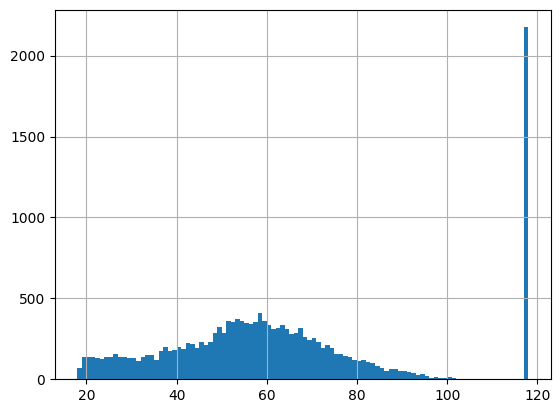

In [ ]:
# присутствуют долгожители по 118 лет. Посмотрим распределение по возрасту
customers['age'].hist(bins=100)

In [ ]:
customers.query('age == 118').shape[0]

2175

In [ ]:
round(customers.query('age == 118').shape[0] / customers.shape[0] * 100,2)

12.79

Имеем 2175 118-летних клиентов, 12.8% от базы.

Посмотрим подробнее эту выборку

In [ ]:
customers.query('age == 118')

,customer_id,became_member_on,gender,age,income,became_member_year,male,female
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,118,NaN,2017,NaN,NaN
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,118,NaN,2018,NaN,NaN
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,118,NaN,2017,NaN,NaN
6,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,118,NaN,2017,NaN,NaN
7,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,118,NaN,2017,NaN,NaN
...,...,...,...,...,...,...,...,...
16980,5c686d09ca4d475a8f750f2ba07e0440,2016-09-01,NaN,118,NaN,2016,NaN,NaN
16982,d9ca82f550ac4ee58b6299cf1e5c824a,2016-04-15,NaN,118,NaN,2016,NaN,NaN
16989,ca45ee1883624304bac1e4c8a114f045,2018-03-05,NaN,118,NaN,2018,NaN,NaN
16991,a9a20fa8b5504360beb4e7c8712f8306,2016-01-16,NaN,118,NaN,2016,NaN,NaN


In [ ]:
customers.query('age == 118').describe()

,became_member_on,age,income,became_member_year,male,female
count,2175,2175.0,0.0,2175.000000,0.0,0.0
mean,2017-03-29 19:53:42.620689920,118.0,NaN,2016.736092,NaN,NaN
min,2013-08-02 00:00:00,118.0,NaN,2013.000000,NaN,NaN
25%,2016-07-04 12:00:00,118.0,NaN,2016.000000,NaN,NaN
50%,2017-07-31 00:00:00,118.0,NaN,2017.000000,NaN,NaN
75%,2017-12-26 00:00:00,118.0,NaN,2017.000000,NaN,NaN
max,2018-07-26 00:00:00,118.0,NaN,2018.000000,NaN,NaN
std,NaN,0.0,NaN,1.020606,NaN,NaN


Похоже на то, что это какие-то глюки в базе данных.
Пользователи, у которых нет ни возраста, ни пола, ни дохода. Причем, только у них всех одновременно.
Значения 118 заполним пропусками, а самих клиентов выделим в отдельную группу.

In [ ]:
customers['age118'] = customers.query('age == 118').replace(118,100)['age']
customers['age'].replace(118,np.nan,inplace=True)
customers

<ipython-input-122-7fd73d587b3c>:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





,customer_id,became_member_on,gender,age,income,became_member_year,male,female,age118
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,NaN,NaN,2017,NaN,NaN,100.0
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0,112000.0,2017,0.0,100.0,NaN
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,NaN,NaN,2018,NaN,NaN,100.0
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,2017,0.0,100.0,NaN
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,NaN,NaN,2017,NaN,NaN,100.0
...,...,...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45.0,54000.0,2018,0.0,100.0,NaN
16996,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61.0,72000.0,2018,100.0,0.0,NaN
16997,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49.0,73000.0,2017,100.0,0.0,NaN
16998,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83.0,50000.0,2016,0.0,100.0,NaN


##events

In [ ]:
events.isna().sum()

,0
customer_id,0
event,0
value,0
time,0


In [ ]:
# пропусков нет. Смотрим по столбцам
events['event'].value_counts()

,count
event,
transaction,138953
offer received,76277
offer viewed,57725
offer completed,33579


In [ ]:
#посмотрим, какие значения принимает столбец value при различных значениях event
pd.options.display.max_colwidth = 100
events[['event','value']].groupby(by='event').agg('first')

,value
event,
offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}"
offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
transaction,{'amount': 0.8300000000000001}


In [ ]:
# видим, что есть offer_id и offer id, а также словари с двумя значениями
# заменим пробел на _
events['value'] = events['value'].str.replace('offer id','offer_id')
events[['event','value']].groupby(by='event').agg('first')

,value
event,
offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}"
offer received,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
offer viewed,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d'}
transaction,{'amount': 0.8300000000000001}


In [ ]:
# функция выделения значения
def extract_value (value,param):
  d = json.loads(value.replace('\'','"'))
  return d[param]

In [ ]:
# извлекаем значения в отдельные столбцы
values = ['offer_id','amount','reward']
for x in values:
  events['event_'+x] = events.query('value.str.contains(@x)')['value'].apply(extract_value, param=x)

# проверим
events.groupby(by='event').agg('first')

,customer_id,value,time,event_offer_id,event_amount,event_reward
event,,,,,,
offer completed,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",0,2906b810c7d4411798c6938adc9daaa5,NaN,2.0
offer received,78afa995795e4d85b5d9ceeca43f5fef,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,NaN
offer viewed,389bc3fa690240e798340f5a15918d5c,{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0,f19421c1d4aa40978ebb69ca19b0e20d,NaN,NaN
transaction,02c083884c7d45b39cc68e1314fec56c,{'amount': 0.8300000000000001},0,None,0.83,NaN


In [ ]:
# свяжем транзакции и завершение офера
# для этого в транзакциях, завершающих офер, добавим значение offer_id

# отберем синхронные события у каждого пользователя, и среди них выберем только транзакции и завершение офера
r = events[events.duplicated(['time','customer_id'],False)].query('event == "offer completed" or event == "transaction"').sort_values(by=['customer_id','time','event'])
r.head(8)

,customer_id,event,value,time,event_offer_id,event_amount,event_reward
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414,NaN,8.57,NaN
228423,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",528,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0
228422,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 14.11},528,NaN,14.11,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,2906b810c7d4411798c6938adc9daaa5,NaN,2.0
258883,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 10.27},576,NaN,10.27,NaN
95422,0011e0d4e6b944f998e987f904e8c1e5,offer completed,"{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2', 'reward': 3}",252,2298d6c36e964ae4a3e7e9706d1fb8c2,NaN,3.0
95421,0011e0d4e6b944f998e987f904e8c1e5,transaction,{'amount': 11.93},252,NaN,11.93,NaN


In [ ]:
# сдвинем столбец с offer_id на одну строку вниз, и заполним пропуски значениями из сдвинутого столбца

events['event_offer_id'] = events["event_offer_id"].fillna(r['event_offer_id'].shift())

events[events.duplicated(['time','customer_id'],False)].query('event == "offer completed" or event == "transaction"').sort_values(by=['customer_id','time','event'])

,customer_id,event,value,time,event_offer_id,event_amount,event_reward
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414,f19421c1d4aa40978ebb69ca19b0e20d,NaN,5.0
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414,f19421c1d4aa40978ebb69ca19b0e20d,8.57,NaN
228423,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",528,fafdcd668e3743c1bb461111dcafc2a4,NaN,2.0
228422,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 14.11},528,fafdcd668e3743c1bb461111dcafc2a4,14.11,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,2906b810c7d4411798c6938adc9daaa5,NaN,2.0
...,...,...,...,...,...,...,...
168023,ffff82501cea40309d5fdd7edcca4a07,transaction,{'amount': 17.55},414,2906b810c7d4411798c6938adc9daaa5,17.55,NaN
214717,ffff82501cea40309d5fdd7edcca4a07,offer completed,"{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",504,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,5.0
214716,ffff82501cea40309d5fdd7edcca4a07,transaction,{'amount': 7.79},504,9b98b8c7a33c4b65b9aebfe6a799e6d9,7.79,NaN
258362,ffff82501cea40309d5fdd7edcca4a07,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,2906b810c7d4411798c6938adc9daaa5,NaN,2.0


In [ ]:
# таким же способом, только со сдвигом вверх заполним значение amount у каждорого события offer completed
# т.к. бывали случаи, что одной транзакцией закрывается несколько офферов, то сделаем заполнение в цикле
# заодно посчитаем максимальное количество одновременно закрываемых оферов и оценочное количество таких случаев

r['event_amount_x'] = r['event_amount']
x = 0
while r['event_amount_x'].isna().sum() > 0:
  x += 1
  print(x, r['event_amount_x'].isna().sum())
  r['event_amount_x'] = r["event_amount_x"].fillna(r['event_amount_x'].shift(-1))
r[['event','time','event_amount','event_amount_x']].head(15)

1 33579
2 2962
3 92
4 2


,event,time,event_amount,event_amount_x
168413,offer completed,414,NaN,8.57
168412,transaction,414,8.57,8.57
228423,offer completed,528,NaN,14.11
228422,transaction,528,14.11,14.11
258884,offer completed,576,NaN,10.27
258883,transaction,576,10.27,10.27
95422,offer completed,252,NaN,11.93
95421,transaction,252,11.93,11.93
258980,offer completed,576,NaN,22.05
258981,offer completed,576,NaN,22.05


In [ ]:
# заменяем исходный столбец
events['event_amount'] = events['event_amount'].fillna(r['event_amount_x'])
events[events.duplicated(['time','customer_id'],False)].query('event == "offer completed" or event == "transaction"').sort_values(by=['customer_id','time','event'])

,customer_id,event,value,time,event_offer_id,event_amount,event_reward
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414,f19421c1d4aa40978ebb69ca19b0e20d,8.57,5.0
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414,f19421c1d4aa40978ebb69ca19b0e20d,8.57,NaN
228423,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4', 'reward': 2}",528,fafdcd668e3743c1bb461111dcafc2a4,14.11,2.0
228422,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 14.11},528,fafdcd668e3743c1bb461111dcafc2a4,14.11,NaN
258884,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,2906b810c7d4411798c6938adc9daaa5,10.27,2.0
...,...,...,...,...,...,...,...
168023,ffff82501cea40309d5fdd7edcca4a07,transaction,{'amount': 17.55},414,2906b810c7d4411798c6938adc9daaa5,17.55,NaN
214717,ffff82501cea40309d5fdd7edcca4a07,offer completed,"{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9', 'reward': 5}",504,9b98b8c7a33c4b65b9aebfe6a799e6d9,7.79,5.0
214716,ffff82501cea40309d5fdd7edcca4a07,transaction,{'amount': 7.79},504,9b98b8c7a33c4b65b9aebfe6a799e6d9,7.79,NaN
258362,ffff82501cea40309d5fdd7edcca4a07,offer completed,"{'offer_id': '2906b810c7d4411798c6938adc9daaa5', 'reward': 2}",576,2906b810c7d4411798c6938adc9daaa5,14.23,2.0


In [ ]:
# объединяем таблицы в одну и оставим нужные столбцы

df = events.merge(customers, on='customer_id').merge(offers, left_on='event_offer_id', right_on='offer_id',how='left')[ [
    'customer_id', 'event', 'time', 'event_amount', 'event_reward', 'became_member_on', 'gender',
    'age', 'income', 'offer_id', 'offer_type', 'difficulty', 'reward', 'duration', 'web', 'email', 'mobile', 'social', 'ch_count'] ]
df

,customer_id,event,time,event_amount,event_reward,became_member_on,gender,age,income,offer_id,offer_type,difficulty,reward,duration,web,email,mobile,social,ch_count
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,0,NaN,NaN,2017-05-09,F,75.0,100000.0,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5.0,5.0,168.0,1.0,1.0,1.0,0.0,3.0
1,a03223e636434f42ac4c3df47e8bac43,offer received,0,NaN,NaN,2017-08-04,NaN,NaN,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,20.0,5.0,240.0,1.0,1.0,0.0,0.0,2.0
2,e2127556f4f64592b11af22de27a7932,offer received,0,NaN,NaN,2018-04-26,M,68.0,70000.0,2906b810c7d4411798c6938adc9daaa5,discount,10.0,2.0,168.0,1.0,1.0,1.0,0.0,3.0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,0,NaN,NaN,2017-09-25,NaN,NaN,NaN,fafdcd668e3743c1bb461111dcafc2a4,discount,10.0,2.0,240.0,1.0,1.0,1.0,1.0,4.0
4,68617ca6246f4fbc85e91a2a49552598,offer received,0,NaN,NaN,2017-10-02,NaN,NaN,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10.0,10.0,120.0,1.0,1.0,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,714,1.59,NaN,2018-01-01,M,66.0,47000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,714,9.53,NaN,2018-04-08,M,52.0,62000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306531,a00058cf10334a308c68e7631c529907,transaction,714,3.61,NaN,2013-09-22,F,63.0,52000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,714,3.53,NaN,2016-07-09,M,57.0,40000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# проверим правильность объединения таблиц, посмотирим количество клиентов, должно быть 17000
df['customer_id'].nunique()

17000

# Анализ

##Воронка конверсии

In [ ]:
# построим воронку по событиям, пользователям и среднему числу событий на пользователя
dfe = df.pivot_table(index='event',values='customer_id',aggfunc='count').drop(index='transaction').sort_values(by='customer_id',ascending=False)
dfc = df.pivot_table(index='event',values='customer_id',aggfunc='nunique').drop(index='transaction').sort_values(by='customer_id',ascending=False)

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'events, k',
    y = dfe.index,
    x = dfe['customer_id']/1000,
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'customers, k',
    y = dfc.index,
    x = dfc['customer_id']/1000,
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'events by customers',
    y = dfc.index,
    x = round(dfe['customer_id']/dfc['customer_id'],2),
    textposition = "outside",
    textinfo = "value+percent previous"))

fig.show()

Видим, что воронка по клиентам хорошая. Три четверти клиентов были вовлечены в промо-акции. Почти все охваченные клиенты ознакомились с хотя бы одним предложением.
По оферам результат хуже, было реализовано чуть больше, чем половина оферов.  


##Финансовые показатели

In [ ]:
m = df.pivot_table(index='event',values=['event_amount','event_reward','difficulty'],aggfunc='sum')
m.loc['offer completed','transaction'] = m.loc['transaction','event_amount']
m.dropna(inplace=True)
m.columns = ['Условие офера','Выручка по оферам','Вознаграждение','Все продажи']

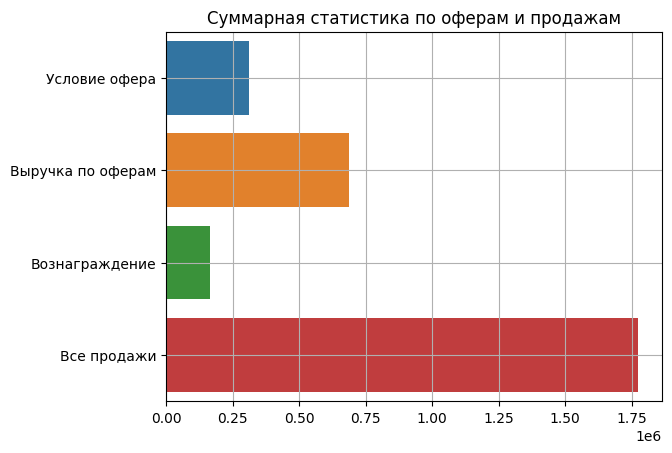

In [ ]:
sns.barplot(m,orient='h')
plt.grid(True)
plt.title("Суммарная статистика по оферам и продажам")
plt.show()

Общий итог - результат хороший.  
Выручка по оферам в 2 раза превышает условие участия.  
Выплаченное вознаграждение составляет четверть от выручки по оферам.  
Выручка по оферам составляет почти половину от общей выручки (но, контрольной группы нет, поэтому не понятно - добавляет ли она к выручке без рекламы и сколько).

##Эффективность каналов

In [ ]:
# посчитаем эффективность рекламных каналов
# количество рассылок
# количество закрытых оферов
# сумма закрытых оферов
# доля закрытых оферов от количества рассылок
# выручка с 1000 рассылок
channels = df.query('event == "offer received"').pivot_table(index='ch_count', values='offer_id', aggfunc='count').rename(columns={'offer_id':'Кол-во рассылок'})
channels['Успешные оферы'] = df.query('event == "offer completed"').pivot_table(index='ch_count', values='offer_id', aggfunc='count')#.rename(columns={'offer_id':'Успешные оферы'})
channels['% закр.офферов'] = round(channels['Успешные оферы']/channels['Кол-во рассылок']*100)
channels['Выручка'] = df.query('event == "offer completed"').pivot_table(index='ch_count', values='event_amount', aggfunc='sum')
channels['Выручка с 1000 рассылок'] = round(channels['Выручка']/channels['Кол-во рассылок']*1000,2)
channels['Средний чек'] = round(channels['Выручка']/channels['Успешные оферы'],2)
channels

,Кол-во рассылок,Успешные оферы,% закр.офферов,Выручка,Выручка с 1000 рассылок,Средний чек
ch_count,,,,,,
2.0,7668,3420,45.0,87898.52,11463.03,25.70
3.0,38202,12059,32.0,248706.50,6510.30,20.62
4.0,30407,18100,60.0,351320.42,11553.93,19.41


Имеем то, что более широкая кампания привлекает большую долю клиентов, но с меньшим средним чеком.

##RFM анализ

In [ ]:
# подготовим таблицу

rfm = df.query('event == "transaction"').pivot_table(index='customer_id',aggfunc={
                                                                              'time':'max',
                                                                              'event':'count',
                                                                              'event_amount':'sum'})
rfm_col = ['F','M','R']
rfm.columns = rfm_col
rfm

,F,M,R
customer_id,,,
0009655768c64bdeb2e877511632db8f,8,127.60,696
00116118485d4dfda04fdbaba9a87b5c,3,4.09,474
0011e0d4e6b944f998e987f904e8c1e5,5,79.46,654
0020c2b971eb4e9188eac86d93036a77,8,196.86,708
0020ccbbb6d84e358d3414a3ff76cffd,12,154.05,672
...,...,...,...
fff3ba4757bd42088c044ca26d73817a,11,580.98,552
fff7576017104bcc8677a8d63322b5e1,6,29.94,696
fff8957ea8b240a6b5e634b6ee8eafcf,5,12.15,576


In [ ]:
#Разбиваем параметры на квантили и присваиваем номер группы каждому клиенту
q = [0, .25, .75, 1.]
l = ['0', '1', '2']

rfm['RFM'] = (
    pd.qcut(rfm['R'], q, labels=l).astype(str) +
    pd.qcut(rfm['F'], q, labels=l).astype(str) +
    pd.qcut(rfm['M'], q, labels=l).astype(str)
)
rfm

,F,M,R,RFM
customer_id,,,,
0009655768c64bdeb2e877511632db8f,8,127.60,696,211
00116118485d4dfda04fdbaba9a87b5c,3,4.09,474,000
0011e0d4e6b944f998e987f904e8c1e5,5,79.46,654,101
0020c2b971eb4e9188eac86d93036a77,8,196.86,708,212
0020ccbbb6d84e358d3414a3ff76cffd,12,154.05,672,122
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,11,580.98,552,012
fff7576017104bcc8677a8d63322b5e1,6,29.94,696,211
fff8957ea8b240a6b5e634b6ee8eafcf,5,12.15,576,000


In [ ]:
# присоединяем к таблице клиентов таблицу с RFM
customers = customers.merge(rfm,how='left',on='customer_id').drop(['F','M','R'],axis=1)
customers['RFM'] = customers['RFM'].fillna('000')
customers

,customer_id,became_member_on,gender,age,income,became_member_year,male,female,age118,RFM
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,NaN,NaN,2017,NaN,NaN,100.0,210
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0,112000.0,2017,0.0,100.0,NaN,001
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,NaN,NaN,2018,NaN,NaN,100.0,210
3,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,F,75.0,100000.0,2017,0.0,100.0,NaN,012
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,NaN,NaN,2017,NaN,NaN,100.0,100
...,...,...,...,...,...,...,...,...,...,...
16995,6d5f3a774f3d4714ab0c092238f3a1d7,2018-06-04,F,45.0,54000.0,2018,0.0,100.0,NaN,110
16996,2cb4f97358b841b9a9773a7aa05a9d77,2018-07-13,M,61.0,72000.0,2018,100.0,0.0,NaN,111
16997,01d26f638c274aa0b965d24cefe3183f,2017-01-26,M,49.0,73000.0,2017,100.0,0.0,NaN,111
16998,9dc1421481194dcd9400aec7c9ae6366,2016-03-07,F,83.0,50000.0,2016,0.0,100.0,NaN,122


In [ ]:
# делаем сводную таблицу по группам, отсекаем малоразмерные
customers.pivot_table(index='RFM',aggfunc={
    'customer_id':'count',
    'became_member_year':"mean",
    'income':'median',
    'age':'median',
    'male':'mean',
    'female':'mean'
}).round().query('customer_id > 630'). \
        rename(columns={'age':'Возраст мед.','became_member_year':'Год регистр. ср.','customer_id':'Кол-во клиентов','female':'Жен. %','income':'Доход','male':'Муж. %'})

,Возраст мед.,Год регистр. ср.,Кол-во клиентов,Жен. %,Доход,Муж. %
RFM,,,,,,
000,54.0,2017.0,1656,30.0,57000.0,70.0
001,60.0,2017.0,1330,53.0,82000.0,47.0
011,55.0,2017.0,647,41.0,59500.0,59.0
100,49.0,2017.0,1108,21.0,50000.0,79.0
101,60.0,2017.0,1192,55.0,78000.0,45.0
110,47.0,2017.0,813,20.0,47000.0,80.0
111,53.0,2017.0,1999,41.0,57000.0,59.0
112,59.0,2016.0,1332,57.0,86000.0,43.0
121,47.0,2016.0,1195,26.0,46000.0,74.0


Перспективные группы для проработки:  
111, 112, 121 - доработать оферы  
000 и 001 - проработать прогрев клиентов

#Выводы

В данной работе был проведен анализ результатов маркетинговой кампании.  

В ходе работы были загружены 3 датасета, обработаны пропуски и аномальные значения.  
Данные были подготовлены к анализу и объединены в один датасет.  

Результаты анализа:  
* Воронка по клиентам хорошая. Три четверти клиентов были вовлечены в промо-акции. Почти все охваченные клиенты ознакомились с хотя бы одним предложением. По оферам результат хуже, было реализовано чуть больше, чем половина оферов.  
* Выручка по оферам в 2 раза превышает условие участия.  
Выплаченное вознаграждение составляет четверть от выручки по оферам.  
* Более широкая по каналам кампания привлекает большую долю клиентов, но с меньшим средним чеком.  
* Более молодые клиенты - более активные.  
Группы 111, 112, 121 - доработать оферы.  
Группы 000 и 001 - проработать прогрев клиентов.